# Logistic Regression

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

import tensorflow as tf

import random
from sklearn import ensemble

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.simplefilter("ignore")

# Activate Seaborn style
sns.set()

C:\Users\fbaff\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fbaff\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fbaff\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\fbaff\AppData\Roaming\Python\Python36\site-

## Import data

In [2]:
# Load the npz file
with np.load('C:/Users/fbaff/EPFL ML Python/4- Machine Learning 2/ML 2 Project/Cifar4-train.npz', allow_pickle=False) as cifar_df:
    # It's a dictionary-like object
    cifar4 = dict(cifar_df.items())

In [3]:
X=cifar4['overfeat']
Xp=cifar4['pixels']
y=cifar4['labels']
names=cifar4['names']

print(X.shape, X.dtype)
print(y.shape, y.dtype)
print(names.shape, names.dtype)

(5000, 4096) float32
(5000,) int64
(4,) <U8


### Split in Train (4000) and Test (1000) data set

In [4]:
# Convert the type of the input matrix to float
X = X.astype(np.float)
Xp=Xp.astype(np.float)

# Create train set
X_tr, X_te, Xp_tr, Xp_te, y_tr, y_te = train_test_split(X, Xp, y, test_size=1000, random_state=0)

print('Train:', X_tr.shape, y_tr.shape)
print('Test:', X_te.shape, y_te.shape)
print('Train Pix:', Xp_tr.shape)
print('Test Pix:', Xp_te.shape)

Train: (4000, 4096) (4000,)
Test: (1000, 4096) (1000,)
Train Pix: (4000, 3072)
Test Pix: (1000, 3072)


## Create a Logistic Regression pipeline

In [5]:
# Create SGDClassifier with log loss (i.e Logistic Regression Classifier) pipeline
pipe3 = Pipeline([
    ('scaler', StandardScaler()), # with standardization StandardScaler()
    ('PCA', None), # optional
    ('sgd_logreg', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=0, n_jobs=-1))
])

In [6]:
pipe3.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('PCA', None),
  ('sgd_logreg', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                 early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                 l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
                 n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
                 random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
                 verbose=0, warm_start=False))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'PCA': None,
 'sgd_logreg': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
               n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
               r

### Define a cross-validation object with a grid of parameters for the SGDCLassifier with Log loss (Logistic Regression)

### Grid search with PCA and without PCA, range of regularization strength

In [7]:
# Create cross-validation object
grid_sgd_logreg = GridSearchCV(pipe3, [{
    'PCA':[PCA(175)], # nb of components explaining 95% of the variance
    'sgd_logreg__alpha':[0.0001, 0.001,0.01,0.1], # regularization strength
}, {
    'sgd_logreg__alpha':[0.0001, 0.001,0.01,0.1]}], # regularization strength
    cv=5)

# Fit estimator
grid_sgd_logreg.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PCA', None),
                                       ('sgd_logreg',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                              

In [8]:
# Get the results with "cv_results_"
grid_sgd_logreg.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_PCA', 'param_sgd_logreg__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

### Collect results in a dataframe

In [10]:
# Collect results in a DataFrame
df_sgd_logreg = pd.DataFrame.from_items([
    ('PCA', grid_sgd_logreg.cv_results_['param_PCA']),
    ('alpha', grid_sgd_logreg.cv_results_['param_sgd_logreg__alpha']),
    ('mean_te', grid_sgd_logreg.cv_results_['mean_test_score']),
    ('std_te_score', grid_sgd_logreg.cv_results_['std_test_score']),
    
])
df_sgd_logreg.sort_values(by='mean_te', ascending=False)

,PCA,alpha,mean_te,std_te_score
7,NaN,0.1,0.83050,0.008500
2,"PCA(copy=True, iterated_power='auto', n_compon...",0.01,0.82525,0.013401
6,NaN,0.01,0.82500,0.013679
3,"PCA(copy=True, iterated_power='auto', n_compon...",0.1,0.82475,0.005916
4,NaN,0.0001,0.82475,0.018503
1,"PCA(copy=True, iterated_power='auto', n_compon...",0.001,0.82400,0.010151
5,NaN,0.001,0.82225,0.016856
0,"PCA(copy=True, iterated_power='auto', n_compon...",0.0001,0.82150,0.009633


### Find the best combination of parameters

In [11]:
# Find best combination
idx = np.argmax(df_sgd_logreg['mean_te'])
print('Top test accuracy on set {:}'.format(idx))

print('Accuracy on test set {:.3f}'.format(
     df_sgd_logreg.mean_te[idx]
     ))

print('PCA {:.3f}'.format(
     df_sgd_logreg.PCA[idx]
     ))
print('Alpha {:.3f}'.format(
     df_sgd_logreg.alpha[idx]
     ))


Top test accuracy on set 7
Accuracy on test set 0.831
PCA nan
Alpha 0.100


In [12]:
#Save the accuracy of the Best SGD Model
SGD_logreg=0.831
%store SGD_logreg

Stored 'SGD_logreg' (float)


## Select 10 images from the Test sets (1000), compute probability of each class and plot images

### Select 10 images form the test Overfeat data set

In [13]:
p0=X_te[50, :]
p1=X_te[100, :]
p2=X_te[253, :]
p3=X_te[452, :]
p4=X_te[600, :]
p5=X_te[620, :]
p6=X_te[750, :]
p7=X_te[823, :]
p8=X_te[885, :]
p9=X_te[999, :]

### Create an array with selected images

In [14]:
select_p=(p0,p1,p2,p3,p4,p5,p6,p7,p8,p9)
select_p

(array([ 4.98828125,  0.21936035, -0.06689453, ..., -0.68554688,
         2.46289062, -2.16210938]),
 array([ 3.6796875 , -0.11376953,  1.40820312, ..., -2.64257812,
         1.94628906,  0.90478516]),
 array([ 5.3046875 , -1.26757812,  0.19006348, ..., -1.95800781,
        -0.51904297, -2.13671875]),
 array([ 4.04296875, -0.79833984,  0.15002441, ..., -0.76416016,
         0.22436523, -1.03222656]),
 array([ 5.609375  , -0.62158203,  0.0904541 , ...,  0.05258179,
         0.51220703, -2.66015625]),
 array([ 1.29589844, -1.75      ,  0.08966064, ...,  0.17175293,
         1.00390625, -2.16796875]),
 array([ 1.86621094, -1.00195312,  2.46289062, ..., -1.68945312,
         1.85742188, -2.12695312]),
 array([ 2.98242188, -1.09179688,  0.00716019, ..., -1.59179688,
         2.13867188, -1.70507812]),
 array([ 4.54296875, -1.45019531,  0.55908203, ..., -1.94628906,
         0.05508423,  0.03860474]),
 array([ 2.04492188,  0.48339844,  0.54638672, ...,  0.13928223,
        -0.07000732, -1.37

### Select Best estimator parameters

In [15]:
pipe4 = Pipeline([
    ('scaler', StandardScaler()), # with standardization StandardScaler()
    ('PCA', None), # optional
    ('sgd_logreg', SGDClassifier(alpha=100, loss='log', max_iter=1000, tol=1e-3, random_state=0, n_jobs=-1))
])

# Fit model on train data set
model4=pipe4.fit(X_tr, y_tr)

### Compute the prediction probabiliyt for each class for the selected images

In [16]:
test=model4.predict_proba(select_p)

### Create a dataframe with results

In [17]:
# Create DataFrame with test scores
proba_c = pd.DataFrame(test)
proba_c.columns=['Truck','Car','Plane','Boat']
pd.options.display.float_format = '{:.4f}'.format
proba_c

,Truck,Car,Plane,Boat
0,0.2839,0.3182,0.2163,0.1817
1,0.3616,0.2467,0.1902,0.2014
2,0.2693,0.1520,0.2935,0.2852
3,0.1691,0.1687,0.3713,0.2909
4,0.2945,0.3304,0.2161,0.1590
5,0.1998,0.1541,0.4142,0.2320
6,0.2667,0.1753,0.3347,0.2233
7,0.3130,0.2290,0.1879,0.2700
8,0.2172,0.1972,0.2766,0.3089
9,0.2285,0.2163,0.3190,0.2362


### Analysis
> It appears that when value of **alpha is less than 0.1** (e.g. 0.01, 0.01, 0.001). **The probability per class does not vary a lot** vs the optimal value of 0.1 for the Best Estimator.
>
> When the alpha value **is tuned up** (e.g. 1, 5, 10, 100). The **model performs badly** and the probability of classification tends to converge towards 0.25 per class.

### Select 10 images from the test data set

In [18]:
img1=Xp_te[50, :].reshape(32,32,3)/255
img2=Xp_te[100, :].reshape(32,32,3)/255
img3=Xp_te[253, :].reshape(32,32,3)/255
img4=Xp_te[452, :].reshape(32,32,3)/255
img5=Xp_te[600, :].reshape(32,32,3)/255
img6=Xp_te[620, :].reshape(32,32,3)/255
img7=Xp_te[750, :].reshape(32,32,3)/255
img8=Xp_te[823, :].reshape(32,32,3)/255
img9=Xp_te[885, :].reshape(32,32,3)/255
img10=Xp_te[999, :].reshape(32,32,3)/255

### Visualize images

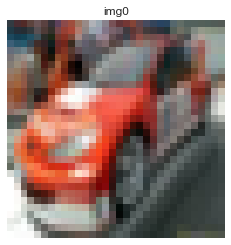

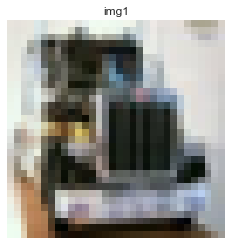

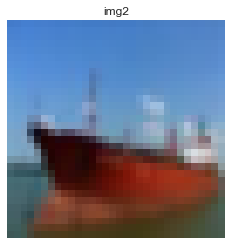

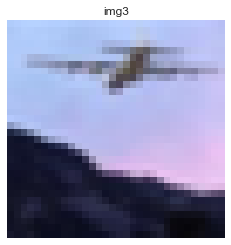

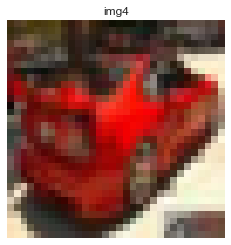

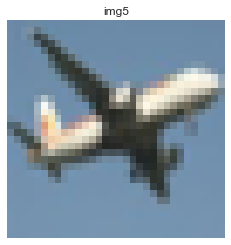

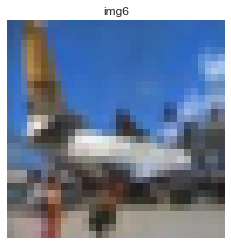

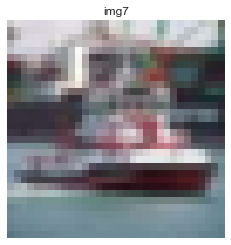

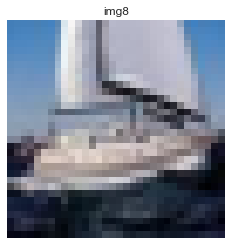

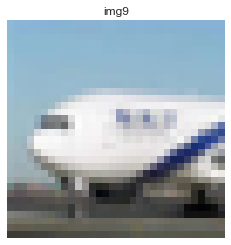

In [19]:
plt.imshow(img1)
plt.axis('off') # Hide the x- and y-axis
plt.title('img0')
plt.show()

plt.imshow(img2)
plt.title('img1')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img3)
plt.title('img2')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img4)
plt.title('img3')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img5)
plt.title('img4')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img6)
plt.title('img5')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img7)
plt.title('img6')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img8)
plt.title('img7')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img9)
plt.title('img8')
plt.axis('off') # Hide the x- and y-axis
plt.show()

plt.imshow(img10)
plt.title('img9')
plt.axis('off') # Hide the x- and y-axis
plt.show()